In [1]:
from qutip import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simulation

In [2]:
size = 12

# define the Hamiltonian and evolution time
x = sigmax()
z = sigmaz()
i = qeye(2)

N = size
tensor_ls = [qeye(2) for i in range(N)]
H = tensor(tensor_ls)
for j in range(N-1):
    pauli = [i for k in range(N)]
    pauli[j] = z
    pauli[j+1] = z
    H = H + 2 * np.pi * 0.025 * tensor(pauli)

pauli = [i for k in range(N)]
pauli[N-1] = z
pauli[0] = z
H = H + 2 * np.pi * 0.025 * tensor(pauli)

for j in range(N):
    pauli = [i for k in range(N)]
    pauli[j] = x
    H = H + 2 * np.pi * 0.125 * tensor(pauli)

# T = 0.25

In [3]:
def ob_value(bin_str1, bin_str2):
    
    if len(bin_str1) != len(bin_str2):
        raise ValueError("Binary strings must have the same length")

    # Compute bitwise product (AND operation)
    bitwise_product = [int(b1) & int(b2) for b1, b2 in zip(bin_str1, bin_str2)]
    
    # Compute modulo 2 sum (XOR sum of all resulting bits)
    mod2_sum = sum(bitwise_product) % 2
    
    return mod2_sum

def z_exp(res, size):
    Z_ob = [format(1 << i, f'0{size}b') for i in range(size)]
    
    ave_z = []
    for ob in Z_ob:
        exp_ob = 0
        for key, value in res.items():
            if ob_value(key, ob) == 0:
                # ground state
                exp_ob = exp_ob - 1 * value
            else:
                # excited state
                exp_ob = exp_ob + 1 * value
        ave_z.append(exp_ob)
    exp_z = sum(ave_z)/len(ave_z)

    return exp_z

def zz_exp(res, size):
    ZZ_ob = []
    for i in range(size):
        first_bit = 1 << i
        second_bit = 1 << ((i + 1) % size)  # Wrap around for the last element
        ZZ_ob.append(format(first_bit | second_bit, f'0{size}b'))
    
    ave_zz = []
    for ob in ZZ_ob:
        exp_ob = 0
        for key, value in res.items():
            if ob_value(key, ob) == 0:
                # 00 or 11
                exp_ob = exp_ob + 1 * value
            else:
                # 01 or 10
                exp_ob = exp_ob - 1 * value
        ave_zz.append(exp_ob)
    exp_zz = sum(ave_zz)/len(ave_zz)

    return exp_zz

In [4]:
Ts = np.arange(0.5, 1.01, 0.01)
print(Ts)

[0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [5]:
# define the initial state
ls_tensor = [basis(2, 0) for i in range(N)]
psi0 = tensor(ls_tensor)


Z_obs = []
ZZ_obs = []
# Ts = np.arange(0.5, 1.01, 0.01)

k = 0
for T in Ts:
    if k % 10 == 0:  
        print(k)
    k = k+1
    result = sesolve(H, psi0, [0, T], [])
    state_real = result.states[1].full()
    num_qubits = int(np.log2(len(state_real)))
    amplitudes = state_real.flatten()  
    probabilities = {
        f"{i:0{num_qubits}b}": abs(amplitudes[i])**2 for i in range(len(amplitudes))
    }
    qutip_res = probabilities
    Z_obs.append(z_exp(qutip_res, size))
    ZZ_obs.append(zz_exp(qutip_res, size))

0


/home/junyuzh/Analog/repo/src/ASPLOS_AE/RealExp/classical_sim/.real/lib/python3.10/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


10
20
30
40
50


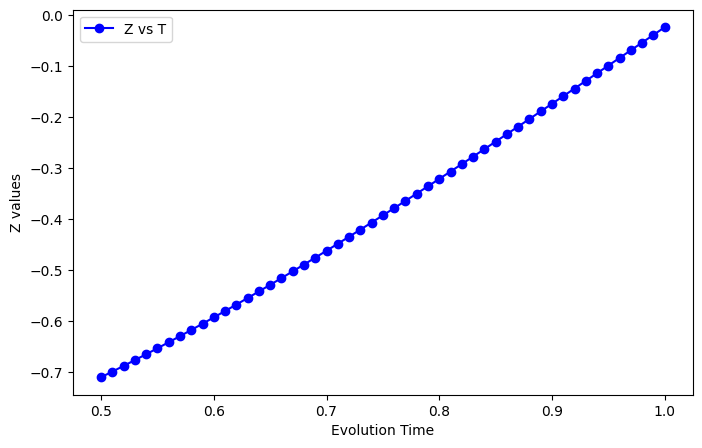

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(Ts, Z_obs, marker='o', linestyle='-', color='b', label="Z vs T")

# Labels and title
plt.xlabel("Evolution Time")
plt.ylabel("Z values")
plt.legend()
plt.show()

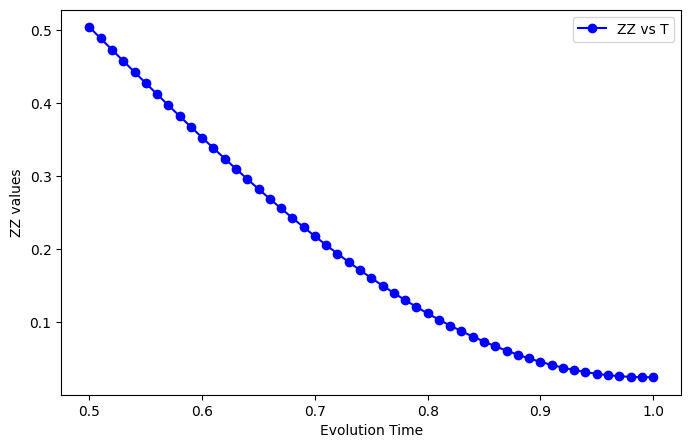

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(Ts, ZZ_obs, marker='o', linestyle='-', color='b', label="ZZ vs T")

# Labels and title
plt.xlabel("Evolution Time")
plt.ylabel("ZZ values")
plt.legend()
plt.show()

In [8]:
import json
data = {
    "exp_Z": Z_obs,
    "exp_ZZ": ZZ_obs
}

# Save to a JSON file
with open("qutip.json", "w") as f:
    json.dump(data, f, indent=4)

print("Data saved successfully!")

Data saved successfully!
